# Node2Vec

In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [5]:
# 数据加载，构造图
G = nx.read_gml('dataset/football.gml')
print(type(G))
print(len(G))

<class 'networkx.classes.graph.Graph'>
115


In [35]:
# 初始化Node2Vec模型
model = Node2Vec(G, walk_length=10, num_walks=5, workers=1, p=0.1, q=5)

Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 5/5 [00:00<00:00, 372.30it/s]


In [36]:
# 模型训练
result = model.fit(window=4, min_count=1, batch_words=4)

In [37]:
# 得到节点的embedding
print(result.wv.most_similar('EastCarolina'))
embeddings = result.wv
print(embeddings)

[('SouthernMississippi', 0.9978313446044922), ('Memphis', 0.9976489543914795), ('Houston', 0.9973276853561401), ('WestVirginia', 0.9973195791244507), ('Tulane', 0.9973098635673523), ('Syracuse', 0.9972965121269226), ('Auburn', 0.9971635341644287), ('Alabama', 0.9971010088920593), ('AlabamaBirmingham', 0.9969859719276428), ('LouisianaState', 0.9969851970672607)]
KeyedVectors<vector_size=128, 115 keys>


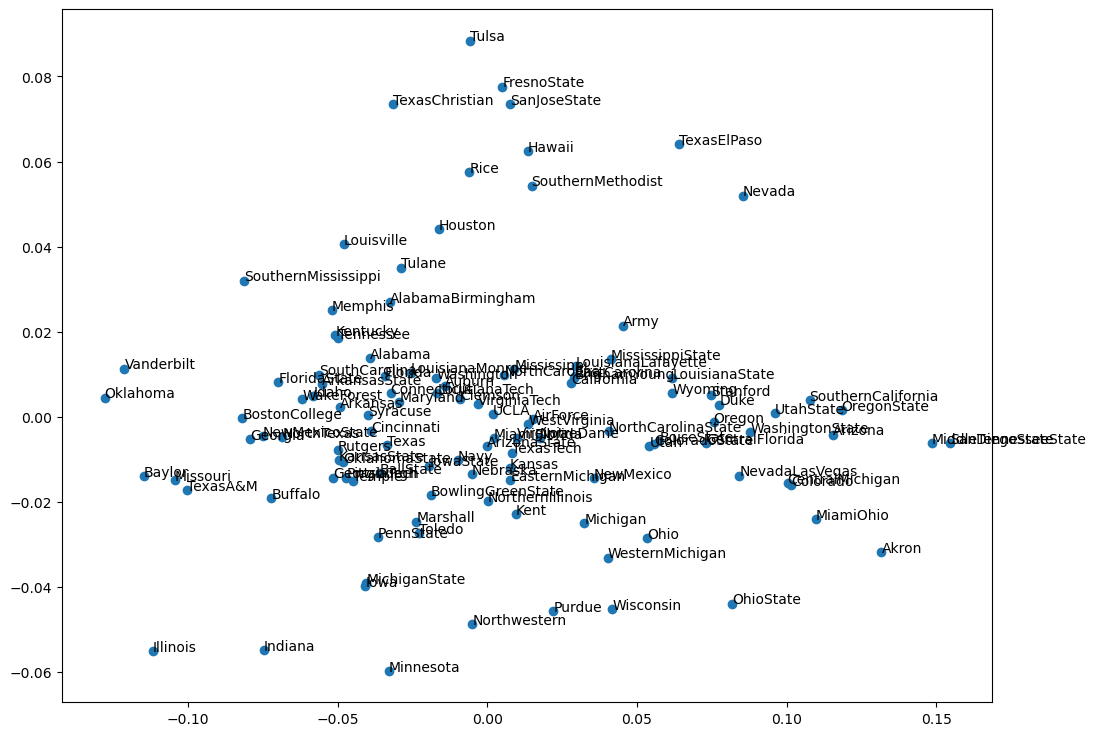

In [38]:
# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
    # 每个节点的embedding为100维
    X = []
    for item in word_list:
        X.append(embeddings[item])
    #print(X.shape)
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X) 
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(list(word_list)):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))        
    plt.show()
    
plot_nodes(result.wv.index_to_key)
